In [1]:
#importing necessary libraries and modules
import pandas as pd 
import matplotlib.pyplot as plt
import snscrape.modules.twitter as sn
from wordcloud import WordCloud, STOPWORDS

#creating a list of stopwords in addition to wordcloud STOPWORDS 
stoplist = ["gameofthrones", "got", "game", "thrones", "gameofthronesfinale", "gameofthonesfinale",
            "watch", "watched", "watching", "episode", "season", "series", "show", "finale", "final",
            "ended", "ending", "end", "last", "time", "will", "wait", "now", "new", "year", "still",
            "think", "thing", "one", "say", "really", "amp", "https"]

In [2]:
#defining function to scrape Game of Thrones related tweets 
def get_got_tweets(start_date, end_date):
    tweets = []

    for i,tweet in enumerate(
            sn.TwitterSearchScraper(
                f'#GameOfThrones since:{start_date} until:{end_date} lang:en'
                ).get_items()):
        if i>1000:
            break
        
        tweets.append([tweet.content])
    return pd.DataFrame(tweets, columns=["Tweets"]) 

In [3]:
#defining function to put tweets in a wordcloud
def cloud(df):
    text = " ".join(word for word in df.Tweets)
            
    word_cloud = WordCloud(
        width=800,
        height=600,
        random_state=1,
        background_color="white",
        max_words=150,
        stopwords=stoplist + list(STOPWORDS),
        collocations=False,
        min_word_length=3
        ).generate(text)

    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()

In [4]:
#scraping tweets from first and last season finale
df_season1 = get_got_tweets('2011-06-20','2011-06-21')
df_season8 = get_got_tweets('2019-05-20','2019-05-21')

First Game of Thrones season finale:


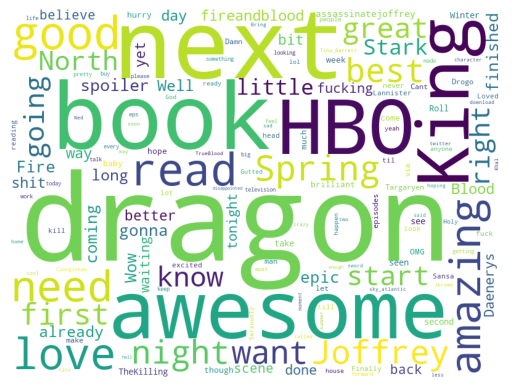

Last Game of Thrones season finale:


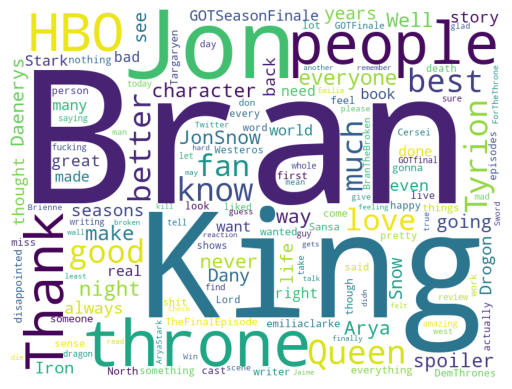

In [5]:
#displaying scraped tweets
print('First Game of Thrones season finale:')
cloud(df_season1)

print('Last Game of Thrones season finale:')
cloud(df_season8) 